### Problem Statement

Predict price of the car based on the risk, normalized losses, fuel-type, make etc. Find cause-effect relation between the features and explain the model

Source: https://archive.ics.uci.edu/ml/datasets/Automobile

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

| #  | Fields             | Description                                        |   |   |
|----|--------------------|----------------------------------------------------|---|---|
| 1  | symboling          | -3, -2, -1, 0, 1, 2, 3.                            |   |   |
| 2  | normalized-losses  | continuous from 65 to   256.                       |   |   |
| 3  | make               | alfa-romero, audi,   bmw, chevrolet, dodge, honda, |   |   |
|    |                    | isuzu, jaguar, mazda,   mercedes-benz, mercury,    |   |   |
|    |                    | mitsubishi, nissan,   peugot, plymouth, porsche,   |   |   |
|    |                    | renault, saab,   subaru, toyota, volkswagen, volvo |   |   |
| 4  | fuel-type          | diesel, gas.                                       |   |   |
| 5  | aspiration         | std, turbo.                                        |   |   |
| 6  | num-of-doors       | four, two.                                         |   |   |
| 7  | body-style         | hardtop, wagon,   sedan, hatchback, convertible.   |   |   |
| 8  | drive-wheels       | 4wd, fwd, rwd.                                     |   |   |
| 9  | engine-location    | front, rear.                                       |   |   |
| 10 | wheel-base         | continuous from 86.6   120.9.                      |   |   |
| 11 | length             | continuous from 141.1   to 208.1.                  |   |   |
| 12 | width              | continuous from 60.3   to 72.3.                    |   |   |
| 13 | height             | continuous from 47.8   to 59.8.                    |   |   |
| 14 | curb-weight        | continuous from 1488   to 4066.                    |   |   |
| 15 | engine-type        | dohc, dohcv, l, ohc,   ohcf, ohcv, rotor.          |   |   |
| 16 | num-of-cylinders   | eight, five, four,   six, three, twelve, two.      |   |   |
| 17 | engine-size        | continuous from 61 to   326.                       |   |   |
| 18 | fuel-system        | 1bbl, 2bbl, 4bbl,   idi, mfi, mpfi, spdi, spfi.    |   |   |
| 19 | bore               | continuous from 2.54   to 3.94.                    |   |   |
| 20 | stroke             | continuous from 2.07   to 4.17.                    |   |   |
| 21 | compression-ratio  | continuous from 7 to   23.                         |   |   |
| 22 | horsepower         | continuous from 48 to   288.                       |   |   |
| 23 | peak-rpm           | continuous from 4150   to 6600.                    |   |   |
| 24 | city-mpg           | continuous from 13 to   49.                        |   |   |
| 25 | highway-mpg        | continuous from 16 to   54.                        |   |   |
| 26 | price              | continuous from 5118   to 45400.                   |   |   |

#### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to build Regression Models
from sklearn.linear_model import LinearRegression # Linear Regression Model for prediction
from sklearn.model_selection import train_test_split #Splt data into train and test
import statsmodels.formula.api as smf # Linear Regression Model 
from sklearn import metrics # Model Evaluation

#### Loadn & View Data
Load the column names given in text format into a list

In [2]:
# Read the column names into a list
col_names = []
delimiter = " "
with open('column_names.txt') as f:
    for i in range(0,26):
        col_names.append(f.readline().split(delimiter)[0])

In [3]:
len(col_names)

26

In [4]:
col_names

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [5]:
df = pd.read_table('car_price.data',sep=',', na_values='?',header=None, names=col_names)

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94
stroke,201.0,3.255423,0.316717,2.07,3.11,3.29,3.41,4.17


Observation:

There are missing values in the dependent field. It is not advisable to impute missing values in depedent variable. Let us exclude these from the analysis

In [9]:
df_new = df[~df['price'].isnull()].copy()

In [10]:
df_new.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


Observation:

As rows from in between have been removed, we need to reset the index

In [11]:
df_new.reset_index(drop=True,inplace=True)

In [12]:
df_new.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [13]:
df_new.shape

(201, 26)

In [14]:
df_new.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
symboling,201.0,NaN,NaN,NaN,0.840796,1.254802,-2.0,0.0,1.0,2.0,3.0
normalized-losses,164.0,NaN,NaN,NaN,122.0,35.442168,65.0,94.0,115.0,150.0,256.0
make,201,22,toyota,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel-type,201,2,gas,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,201,2,std,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num-of-doors,199,2,four,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body-style,201,5,sedan,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive-wheels,201,3,fwd,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine-location,201,2,front,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheel-base,201.0,NaN,NaN,NaN,98.797015,6.066366,86.6,94.5,97.0,102.4,120.9


#### Data Cleanup

In [15]:
df_new.isnull().sum()[df_new.isnull().sum() > 0]

normalized-losses    37
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
dtype: int64

<AxesSubplot:xlabel='normalized-losses', ylabel='Count'>

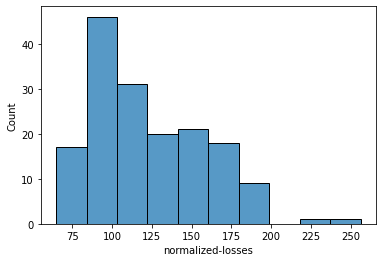

In [16]:
sns.histplot(x='normalized-losses', data=df_new)

In [17]:
# Missing data in normalized-losses field
df_new['normalized-losses'].isnull().sum()/df_new.shape[0]

0.18407960199004975

Observation:

We see that 18.41% of data is missing in 'normalized-losses' field and it is right-skewed. Hence, we choose to impute the missing values with median.

In [18]:
df_new['normalized-losses'].fillna(df_new['normalized-losses'].median(), inplace=True)

In [19]:
df_new[df_new['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
26,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
60,0,115.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [20]:
df_new['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

Observation:

As missing values in num-of-doors correspond to 'sedan' body-style, we can impute 'four'.

In [21]:
df_new['num-of-doors'].fillna('four', inplace=True)

Let's impute median value to other missing values in the numeric fields

In [22]:
df_new['bore'].fillna(df_new['bore'].median(), inplace=True)
df_new['stroke'].fillna(df_new['stroke'].median(), inplace=True)
df_new['horsepower'].fillna(df_new['horsepower'].median(), inplace=True)
df_new['peak-rpm'].fillna(df_new['peak-rpm'].median(), inplace=True)

In [23]:
df_new.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Few algorithms throw error if '-' is used in column names. Let us rename the columns having '-' with '_' to avoid this error

In [24]:
df_new.rename(columns={'normalized-losses':'normalized_losses','fuel-type':'fuel_type', 'num-of-doors':'num_of_doors',
                      'body-style':'body_style', 'drive-wheels':'drive_wheels', 'engine-location':'engine_location',
                      'wheel-base':'wheel_base', 'curb-weight':'curb_weight', 'engine-type':'engine_type',
                      'num-of-cylinders':'num_of_cylinders','engine-size':'engine_size', 'fuel-system':'fuel_system',
                      'compression-ratio':'compression_ratio','peak-rpm':'peak_rpm','city-mpg':'city_mpg',
                      'highway-mpg':'highway_mpg'}, inplace=True)

In [25]:
df_new.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
symboling,201.0,NaN,NaN,NaN,0.840796,1.254802,-2.0,0.0,1.0,2.0,3.0
normalized_losses,201.0,NaN,NaN,NaN,120.711443,32.111623,65.0,101.0,115.0,137.0,256.0
make,201,22,toyota,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type,201,2,gas,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,201,2,std,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_of_doors,201,2,four,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body_style,201,5,sedan,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive_wheels,201,3,fwd,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine_location,201,2,front,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheel_base,201.0,NaN,NaN,NaN,98.797015,6.066366,86.6,94.5,97.0,102.4,120.9


In [26]:
df_new.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

Let's replace numeric values given as text with actual numbers

In [27]:
df_new.num_of_doors.replace({'four':4,'two':2}, inplace=True)

In [28]:
df_new.num_of_cylinders.value_counts()

four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [29]:
df_new.num_of_cylinders.replace({'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12}, inplace=True)

### EDA

#### Univariate Analysis

<AxesSubplot:xlabel='price'>

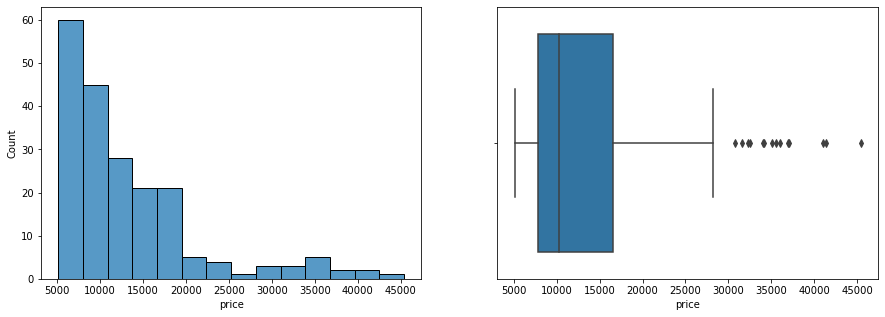

In [30]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='price', data=df_new, ax=axs[0])
sns.boxplot(x='price', data=df_new,ax=axs[1])

<AxesSubplot:xlabel='normalized_losses'>

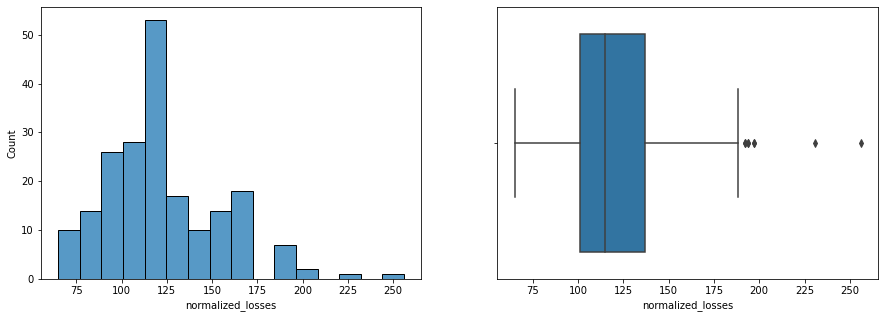

In [31]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='normalized_losses', data=df_new, ax=axs[0])
sns.boxplot(x='normalized_losses', data=df_new,ax=axs[1])

<AxesSubplot:xlabel='horsepower'>

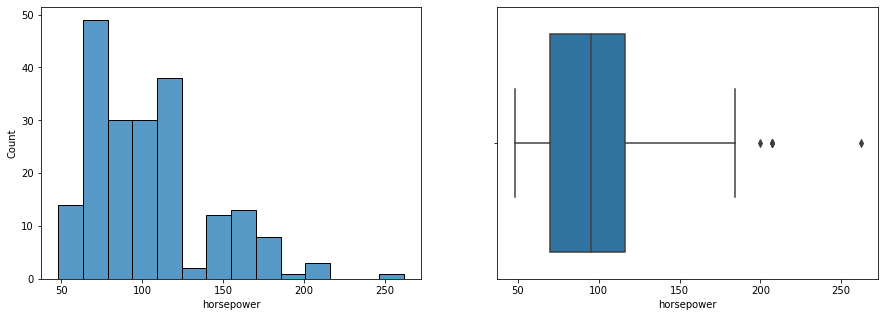

In [32]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x='horsepower', data=df_new, ax=axs[0])
sns.boxplot(x='horsepower', data=df_new,ax=axs[1])

Observation:

Numeric fields like price, normalized_losses, horsepower are right skewed and also have outliers

In [33]:
df_new.make.nunique()

22

In [34]:
df_new.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
jaguar            3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

<AxesSubplot:xlabel='count', ylabel='make'>

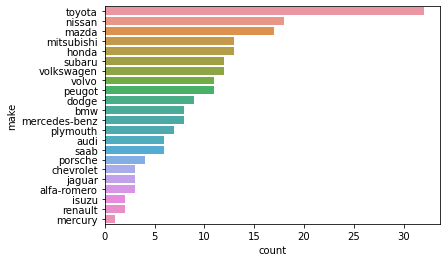

In [35]:
sns.countplot(y='make', data=df_new, order=df_new.make.value_counts().index)

Observation:

The data contains 22 car makes with 'toyota' being maximum in number i.e. 32

<AxesSubplot:xlabel='count', ylabel='body_style'>

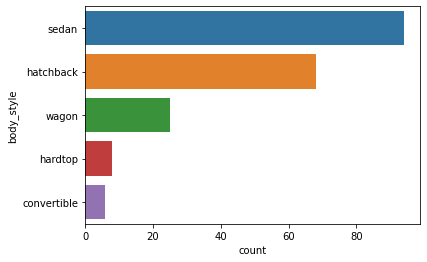

In [36]:
sns.countplot(y='body_style', data=df_new, order=df_new.body_style.value_counts().index)

<AxesSubplot:xlabel='aspiration', ylabel='count'>

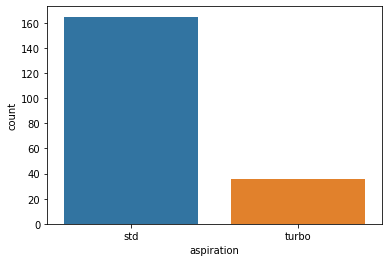

In [37]:
sns.countplot(x='aspiration', data=df_new, order=df_new.aspiration.value_counts().index)

#### Bivariate Analysis

In [38]:
df_num = df_new.select_dtypes(exclude='object')

In [39]:
num_list = df_num.columns
num_list

Index(['symboling', 'normalized_losses', 'num_of_doors', 'wheel_base',
       'length', 'width', 'height', 'curb_weight', 'num_of_cylinders',
       'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [40]:
len(num_list)

18

In [41]:
df_cat = df_new.select_dtypes(include='object')

In [42]:
cat_list = df_cat.columns
cat_list

Index(['make', 'fuel_type', 'aspiration', 'body_style', 'drive_wheels',
       'engine_location', 'engine_type', 'fuel_system'],
      dtype='object')

In [43]:
len(cat_list)

8

<AxesSubplot:xlabel='count', ylabel='make'>

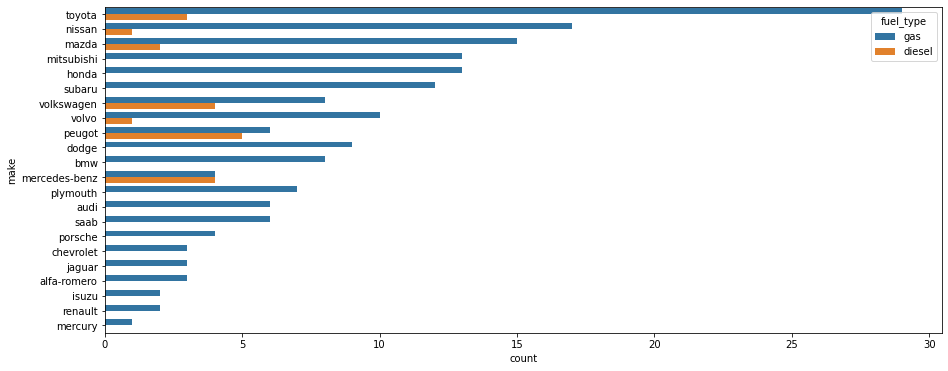

In [44]:
plt.subplots(figsize=(15,6))
sns.countplot(y='make',hue='fuel_type', data=df_new, order=df_new.make.value_counts().index)

Observation:

7 car makes, toyota; nissan; mazda; volkswagon; peugot; volvo; mercedes-benz have cars with both fuel types (gas and diesel) whiel other makes are with only gas fuel type

<AxesSubplot:xlabel='count', ylabel='body_style'>

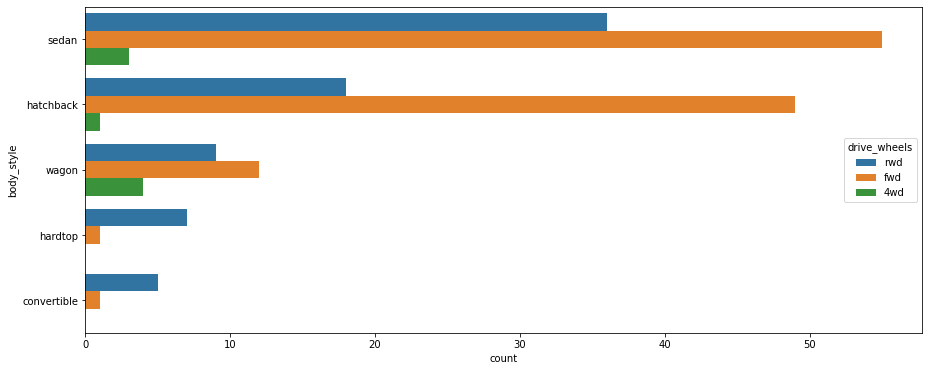

In [45]:
plt.subplots(figsize=(15,6))
sns.countplot(y='body_style',hue='drive_wheels', data=df_new, order=df_new.body_style.value_counts().index)

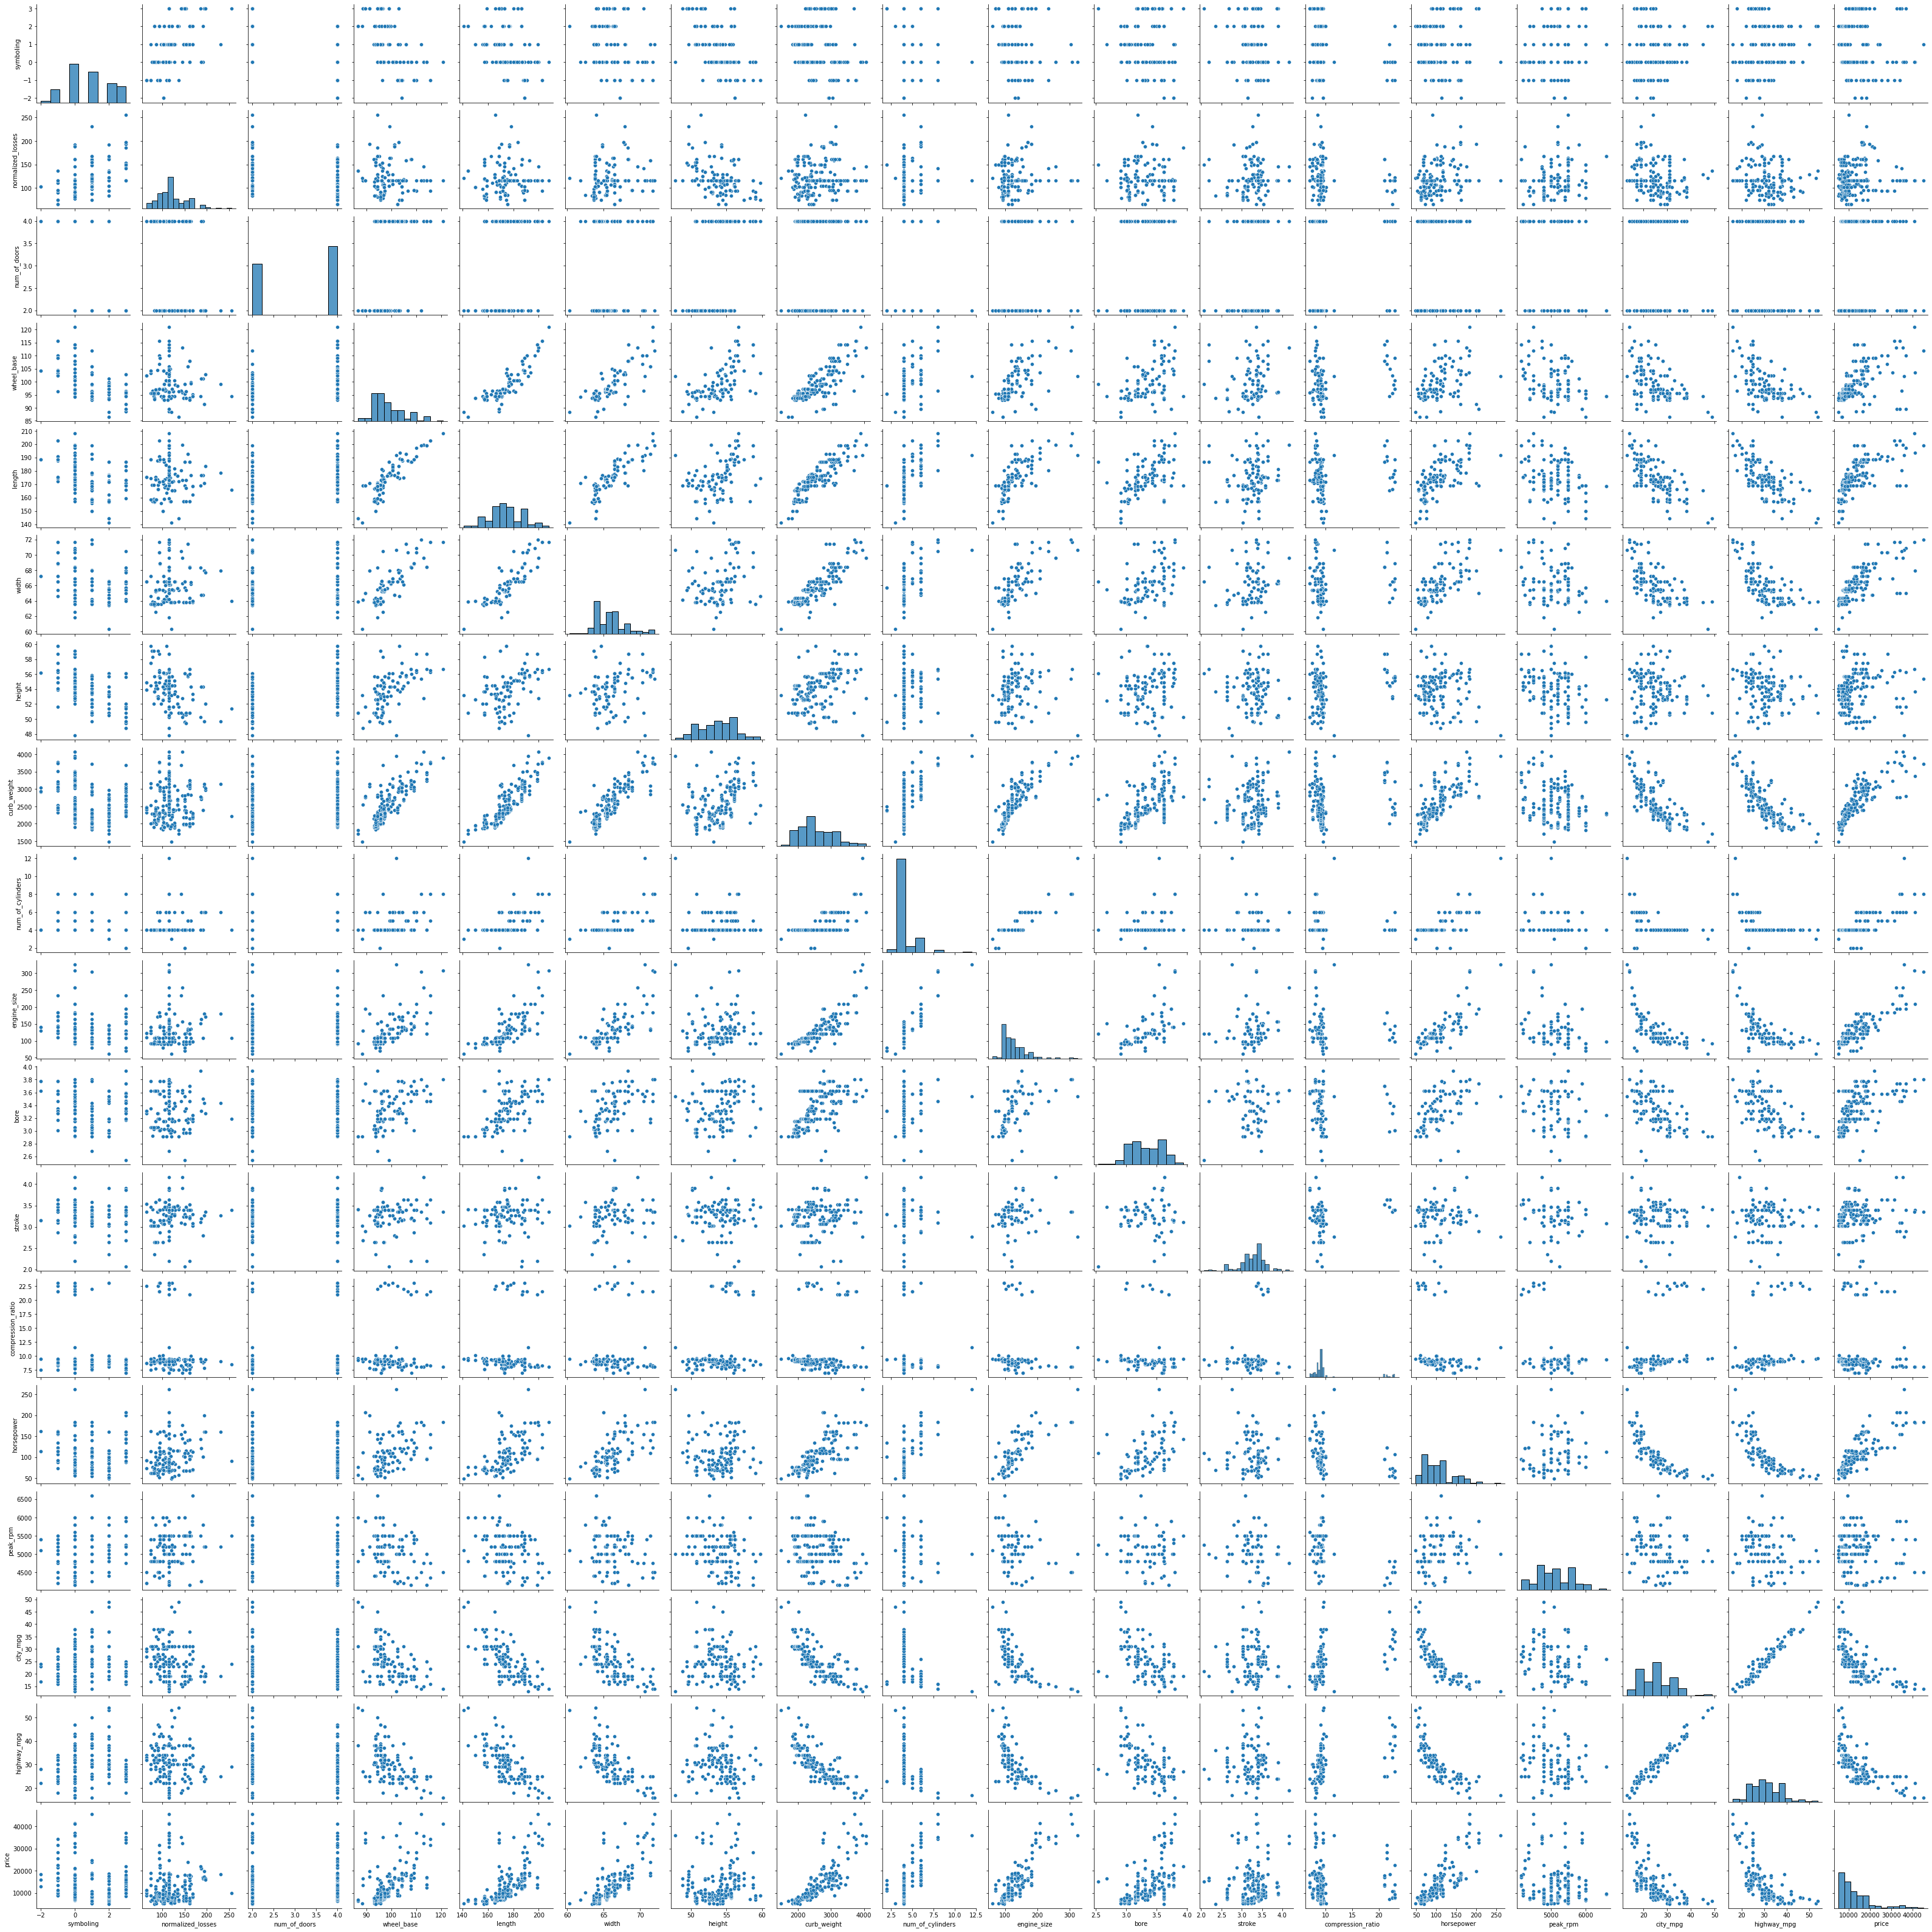

In [46]:
sns.pairplot(vars=num_list, data=df_new)

Observation:

From the pairplot, we see there are many features with positive or negative correlation. 'city_mpg' and 'length' shows negative correlation. 'engine_size' and 'price' has positive correlation.


<AxesSubplot:xlabel='price', ylabel='horsepower'>

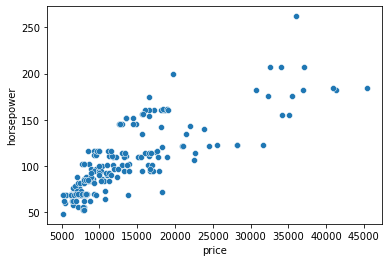

In [47]:
sns.scatterplot(x='price', y='horsepower', data=df_new)

'price' and 'horsepower' have positive correlation. As 'horsepower' increases, 'price' also increases.

In [48]:
corr = df_new[num_list].corr()

In [49]:
corr

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.457735,-0.672344,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.118016,-0.110581,-0.142547,-0.004387,-0.182196,0.075486,0.279897,-0.035527,0.036233,-0.082391
normalized_losses,0.457735,1.000000,-0.355303,-0.075109,-0.009116,0.061799,-0.371830,0.065393,0.080549,0.073586,-0.052094,0.046024,-0.115967,0.182479,0.245899,-0.193896,-0.150773,0.094366
num_of_doors,-0.672344,-0.355303,1.000000,0.445245,0.395122,0.227655,0.538383,0.208517,0.002225,0.024094,0.120915,-0.010194,0.169164,-0.102504,-0.232247,-0.027617,-0.045787,0.042435
wheel_base,-0.535987,-0.075109,0.445245,1.000000,0.876024,0.814507,0.590742,0.782097,0.348931,0.572027,0.494065,0.156740,0.250313,0.372156,-0.360946,-0.470606,-0.543304,0.584642
length,-0.365404,-0.009116,0.395122,0.876024,1.000000,0.857170,0.492063,0.880665,0.440348,0.685025,0.609557,0.123016,0.159733,0.578683,-0.285301,-0.665192,-0.698142,0.690628
width,-0.242423,0.061799,0.227655,0.814507,0.857170,1.000000,0.306002,0.866201,0.520118,0.729436,0.544986,0.188605,0.189867,0.614146,-0.245273,-0.633531,-0.680635,0.751265
height,-0.550160,-0.371830,0.538383,0.590742,0.492063,0.306002,1.000000,0.307581,0.007776,0.074694,0.182946,-0.064380,0.259737,-0.086078,-0.310513,-0.049800,-0.104812,0.135486
curb_weight,-0.233118,0.065393,0.208517,0.782097,0.880665,0.866201,0.307581,1.000000,0.604454,0.849072,0.644434,0.166809,0.156433,0.757961,-0.279429,-0.749543,-0.794889,0.834415
num_of_cylinders,-0.118016,0.080549,0.002225,0.348931,0.440348,0.520118,0.007776,0.604454,1.000000,0.847639,0.205936,0.008480,-0.018138,0.669385,-0.152422,-0.439432,-0.473746,0.708645
engine_size,-0.110581,0.073586,0.024094,0.572027,0.685025,0.729436,0.074694,0.849072,0.847639,1.000000,0.574504,0.203043,0.028889,0.822167,-0.256503,-0.650546,-0.679571,0.872335


<AxesSubplot:>

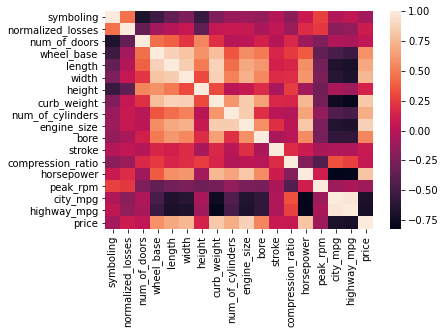

In [50]:
sns.heatmap(corr)

Observation:

As we observe strong correlation between independent variables (>0.7), there is multicolinearity in the data which can be resolved to ensure model built is a stable model

<AxesSubplot:xlabel='price', ylabel='make'>

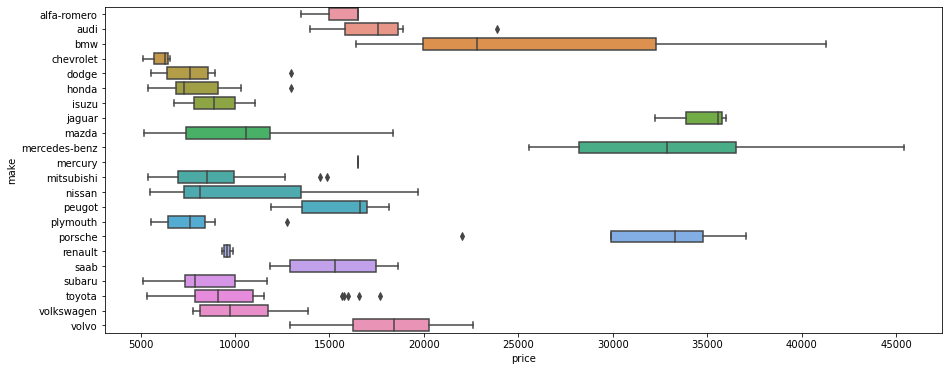

In [51]:
plt.subplots(figsize=(15,6))
sns.boxplot(y='make', x='price', data=df_new)

Observation:

Median 'price' of jaguar is highest comapred to other car makes, followed by porsche and mercedes-benz. chevrolet has the lowest median price.

<AxesSubplot:xlabel='fuel_type', ylabel='price'>

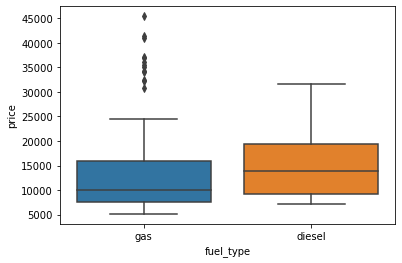

In [52]:
sns.boxplot(x='fuel_type', y='price', data=df_new)

Observation:

Median price of diesel cars is higher than that of car with fuel_type as gas

#### Multivariate Analysis

<AxesSubplot:xlabel='body_style', ylabel='price'>

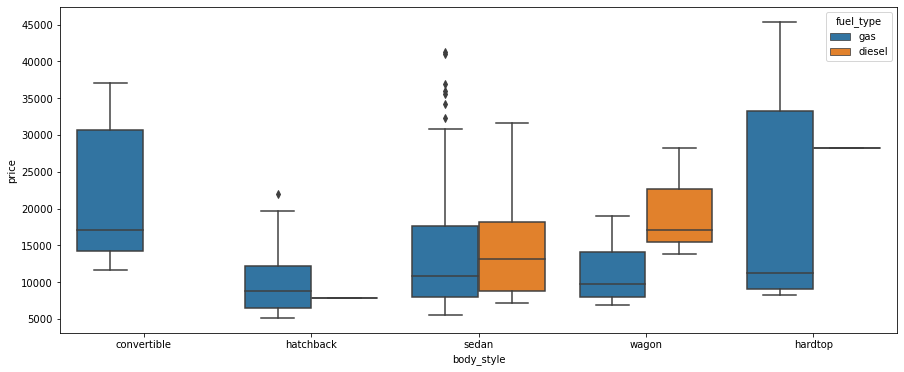

In [53]:
plt.subplots(figsize=(15,6))
sns.boxplot(x='body_style', y='price', data=df_new, hue='fuel_type')

Observation:

Range of cars with fuel_type of gas and diesel is available only for sedan and wagon 'body_style' cars. Median price of diesel cars is higher compared to the gas fuel_type

### Data Preparation

#### Outlier Treatment

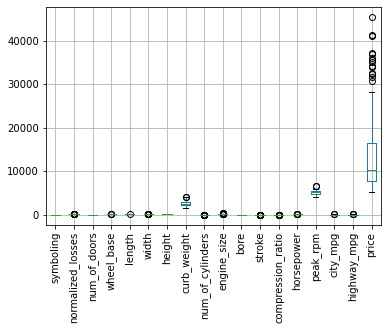

In [54]:
df_new[num_list].boxplot()
plt.xticks(rotation=90)
plt.show()

Observation:

All numeric fields have outliers. As Linear Regression model is sensitive to outliers, we need to treat them.

In [55]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q1=np.percentile(x,25)
    q3=np.percentile(x,75)
    #calculationg IQR range
    IQR=q3-q1
    #Calculating minimum threshold
    lower_bound=q1-(1.5*IQR)
    upper_bound=q3+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [56]:
for i in num_list:
    df_new[i]=treat_outlier(df_new[i])

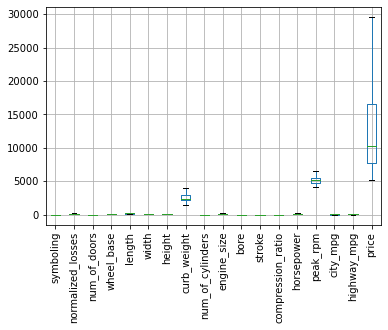

In [57]:
df_new[num_list].boxplot()
plt.xticks(rotation=90)
plt.show()

Let's use label encoder to prepare the categorical fields

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le = LabelEncoder()

In [60]:
df_new[cat_list] = df_new[cat_list].apply(le.fit_transform)

In [61]:
df_new.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,0,1,0,2,0,2,0,88.6,...,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,115.0,0,1,0,2,0,2,0,88.6,...,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,115.0,0,1,0,2,2,2,0,94.5,...,152.0,5,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2,164.0,1,1,0,4,3,1,0,99.8,...,109.0,5,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2,164.0,1,1,0,4,3,0,0,99.4,...,136.0,5,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [62]:
df_new.shape

(201, 26)

In [63]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   make               201 non-null    int32  
 3   fuel_type          201 non-null    int32  
 4   aspiration         201 non-null    int32  
 5   num_of_doors       201 non-null    int64  
 6   body_style         201 non-null    int32  
 7   drive_wheels       201 non-null    int32  
 8   engine_location    201 non-null    int32  
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    float64
 14  engine_type        201 non-null    int32  
 15  num_of_cylinders   201 non-null    float64
 16  engine_size        201 non

In [64]:
df_new.body_style.value_counts()

3    94
2    68
4    25
1     8
0     6
Name: body_style, dtype: int64

In [65]:
df_new.fuel_type.value_counts()

1    181
0     20
Name: fuel_type, dtype: int64

### Linear Regression Model

In [66]:
x_lr_all = df_new.drop(['price'], axis=1)
y_lr_all = df_new['price']

x_train_lr_all, x_test_lr_all, y_train_lr_all, y_test_lr_all = train_test_split(x_lr_all,y_lr_all,
                                                                                test_size=0.30,random_state=123)

df_train_lr_all = pd.concat([x_train_lr_all,y_train_lr_all], axis=1)
df_test_lr_all = pd.concat([x_test_lr_all,y_test_lr_all], axis=1)

#### MLR using sklearn library

In [67]:
# Create object mlr of LinearRegression
mlr = LinearRegression()

In [68]:
# Fit the model
mlr.fit(x_train_lr_all, y_train_lr_all)

LinearRegression()

In [69]:
# R Squared for train data
mlr.score(x_train_lr_all, y_train_lr_all)

0.9215236619303828

In [70]:
# Predict for train dataset
y_train_predict = mlr.predict(x_train_lr_all)

In [71]:
# RMSE on train dataset
y_train_rmse = metrics.mean_squared_error(y_train_lr_all, y_train_predict, squared=False)
y_train_rmse

2040.1105224672278

In [72]:
# R Squared for test data
mlr.score(x_test_lr_all, y_test_lr_all)

0.6891697330068947

In [73]:
# Predict for test dataset
y_test_predict = mlr.predict(x_test_lr_all)

In [74]:
y_test_rmse = metrics.mean_squared_error(y_test_lr_all, y_test_predict, squared=False)
y_test_rmse

2473.324270338038

In [75]:
df_train_lr_all.shape

(140, 26)

In [76]:
df_test_lr_all.shape

(61, 26)

In [77]:
def formula_from_cols(df, y):
    return y + ' ~ ' + ' + '.join([col for col in df.columns if not col==y])

In [78]:
label = 'price'
f_1 = formula_from_cols(df_train_lr_all,label)
f_1

'price ~ symboling + normalized_losses + make + fuel_type + aspiration + num_of_doors + body_style + drive_wheels + engine_location + wheel_base + length + width + height + curb_weight + engine_type + num_of_cylinders + engine_size + fuel_system + bore + stroke + compression_ratio + horsepower + peak_rpm + city_mpg + highway_mpg'

In [79]:
lm_all = smf.ols(formula= f_1, data = df_train_lr_all).fit()

In [80]:
print(lm_all.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     56.27
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.94e-52
Time:                        14:45:01   Log-Likelihood:                -1265.6
No. Observations:                 140   AIC:                             2581.
Df Residuals:                     115   BIC:                             2655.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2329.7243    974.78

Observation:

The model built with all the features is able to explain 90.5% of the variance in price field. However, we have seen that there is multicollinearity problem and also there are many fields that show up as insignificant in the above summary

In [81]:
y_pred_test_all = lm_all.predict(df_test_lr_all)
rmse_all = metrics.mean_squared_error(y_test_lr_all, y_pred_test_all, squared=False)
rmse_all

2473.3242703380424

In [82]:
x_train_sigfld = x_train_lr_all[['normalized_losses', 'make', 'body_style', 'drive_wheels', 'engine_location','curb_weight',
                                 'num_of_cylinders','bore','stroke','horsepower']]
x_train_sigfld.head()

,normalized_losses,make,body_style,drive_wheels,engine_location,curb_weight,num_of_cylinders,bore,stroke,horsepower
149,77.0,19,4,1,0,2280.0,4.0,3.05,3.03,62.0
114,161.0,13,3,2,0,3130.0,4.0,3.61,3.21,142.0
184,94.0,20,3,1,0,2300.0,4.0,3.19,3.40,100.0
8,158.0,1,3,1,0,3086.0,4.0,3.13,3.40,140.0
152,91.0,19,3,1,0,2081.0,4.0,3.19,3.03,70.0


In [83]:
x_test_sigfld = x_test_lr_all[['normalized_losses', 'make', 'body_style', 'drive_wheels', 'engine_location','curb_weight',
                                 'num_of_cylinders','bore','stroke','horsepower']]
x_test_sigfld.head()

,normalized_losses,make,body_style,drive_wheels,engine_location,curb_weight,num_of_cylinders,bore,stroke,horsepower
50,113.0,8,3,1,0,1945.0,4.0,3.03,3.15,68.0
91,128.0,12,3,1,0,1951.0,4.0,3.15,3.29,69.0
37,106.0,5,2,1,0,2289.0,4.0,3.15,3.58,86.0
150,81.0,19,4,0,0,2290.0,4.0,3.05,3.03,62.0
19,81.0,3,3,1,0,1909.0,4.0,3.03,3.11,70.0


In [84]:
mlr_sigfld = LinearRegression()

In [85]:
mlr_sigfld.fit(x_train_sigfld, y_train_lr_all)

LinearRegression()

In [86]:
mlr_sigfld.score(x_train_sigfld, y_train_lr_all)

0.8988047952312268

In [87]:
y_train_predict_sigfld = mlr_sigfld.predict(x_train_sigfld)

In [88]:
y_train_rmse_sigfld = metrics.mean_squared_error(y_train_lr_all, y_train_predict_sigfld, squared=False)
y_train_rmse_sigfld

2316.6706569630514

In [89]:
mlr_sigfld.score(x_test_sigfld, y_test_lr_all)

0.6724327400641237

In [90]:
y_test_predict_sigfld = mlr_sigfld.predict(x_test_sigfld)

In [91]:
y_test_rmse_sigfld = metrics.mean_squared_error(y_test_lr_all, y_test_predict_sigfld, squared=False)
y_test_rmse_sigfld

2539.0406407469354

In [92]:
mlr_sigfld.intercept_

-1178.7544691155217

In [93]:
mlr_sigfld.coef_

array([-1.63606631e+01, -1.85387485e+02, -3.44356660e+02,  2.22579000e+03,
        1.07316422e+04,  9.12870824e+00,  2.72848411e-12, -1.87545076e+03,
       -1.33512573e+03,  3.28018094e+01])

In [94]:
x_test_sigfld.head()

,normalized_losses,make,body_style,drive_wheels,engine_location,curb_weight,num_of_cylinders,bore,stroke,horsepower
50,113.0,8,3,1,0,1945.0,4.0,3.03,3.15,68.0
91,128.0,12,3,1,0,1951.0,4.0,3.15,3.29,69.0
37,106.0,5,2,1,0,2289.0,4.0,3.15,3.58,86.0
150,81.0,19,4,0,0,2290.0,4.0,3.05,3.03,62.0
19,81.0,3,3,1,0,1909.0,4.0,3.03,3.11,70.0


##### Conclusion:

The final linear regression model is built by excluding non significant features is able to explain 89.88% of the variance in data.

Final model is:

price = -1178.75 - 16.4*normalized_losses -185.4*make -344.4*body_style + 2225.8*drive_wheels + 10731.64*engine_location + 9.13*curb_weight +2.72e-12*num_of_cylinders - 1875.5*bore  - 1335.1*stroke +32.8*horsepower  


##### Enjoy the Learning Journey!!!